In [1]:
Title: Stock Prediction

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
file = 'C:/Users/pc/Desktop/HUstock.csv'
data = pd.read_csv(file)
data.head(10)


,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,HINDUNILVR,14-10-2022,2590.000000,2624.899902,2570.199951,2575.800049,2537.905029,1001536
1,HINDUNILVR,17-10-2022,2573.600098,2609.949951,2568.000000,2590.550049,2552.437744,778918
2,HINDUNILVR,18-10-2022,2620.000000,2642.000000,2597.000000,2602.250000,2563.965576,1123374
3,HINDUNILVR,19-10-2022,2615.300049,2617.500000,2578.399902,2583.000000,2544.999023,1241979
4,HINDUNILVR,20-10-2022,2568.149902,2610.000000,2568.149902,2600.899902,2562.635498,1428125
5,HINDUNILVR,21-10-2022,2606.000000,2666.750000,2606.000000,2653.899902,2614.855713,2458302
6,HINDUNILVR,24-10-2022,2610.100098,2640.000000,2550.000000,2573.100098,2535.244629,719908
7,HINDUNILVR,25-10-2022,2586.000000,2586.000000,2500.000000,2505.399902,2468.540527,2923789
8,HINDUNILVR,27-10-2022,2494.000000,2530.000000,2488.000000,2519.000000,2481.940674,1846329
9,HINDUNILVR,28-10-2022,2526.100098,2550.899902,2512.000000,2524.250000,2487.113281,1164951


In [3]:
#to know the dimension
data.shape

(248, 8)

In [4]:
#i will collect the summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [5]:
#to check for any null values
print(data.isnull().values.any())

#if there is any missing value for each column
print(data.isnull().sum())

False
Symbol       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
#i will convert the date column to datetime to work with this column as datatype
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

In [7]:
#i will extract the required column
data = data[['Date','Open','Close','High','Low']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    248 non-null    datetime64[ns]
 1   Open    248 non-null    float64       
 2   Close   248 non-null    float64       
 3   High    248 non-null    float64       
 4   Low     248 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.8 KB


In [9]:
print(data.isnull().values.any())
print(data.isnull().sum())

False
Date     0
Open     0
Close    0
High     0
Low      0
dtype: int64


In [11]:
data.set_index('Date', drop=False,inplace=True)
data.head(10)

,Date,Open,Close,High,Low
Date,,,,,
2022-10-14,2022-10-14,2590.000000,2575.800049,2624.899902,2570.199951
2022-10-17,2022-10-17,2573.600098,2590.550049,2609.949951,2568.000000
2022-10-18,2022-10-18,2620.000000,2602.250000,2642.000000,2597.000000
2022-10-19,2022-10-19,2615.300049,2583.000000,2617.500000,2578.399902
2022-10-20,2022-10-20,2568.149902,2600.899902,2610.000000,2568.149902
2022-10-21,2022-10-21,2606.000000,2653.899902,2666.750000,2606.000000
2022-10-24,2022-10-24,2610.100098,2573.100098,2640.000000,2550.000000
2022-10-25,2022-10-25,2586.000000,2505.399902,2586.000000,2500.000000
2022-10-27,2022-10-27,2494.000000,2519.000000,2530.000000,2488.000000


In [12]:
#now for better representation i will set date column as index
#After setting the index, i will access the data using date-based indexing,and perform time series analysis
#i will also set the date column as the index and will be removed from dataframe column

data.set_index('Date', drop=True,inplace=True)
data.head(20)

,Open,Close,High,Low
Date,,,,
2022-10-14,2590.000000,2575.800049,2624.899902,2570.199951
2022-10-17,2573.600098,2590.550049,2609.949951,2568.000000
2022-10-18,2620.000000,2602.250000,2642.000000,2597.000000
2022-10-19,2615.300049,2583.000000,2617.500000,2578.399902
2022-10-20,2568.149902,2600.899902,2610.000000,2568.149902
2022-10-21,2606.000000,2653.899902,2666.750000,2606.000000
2022-10-24,2610.100098,2573.100098,2640.000000,2550.000000
2022-10-25,2586.000000,2505.399902,2586.000000,2500.000000
2022-10-27,2494.000000,2519.000000,2530.000000,2488.000000


In [49]:
#the above 2 codes are same but 1st is drop=False and 2nd is drop=True

In [13]:
print(len(data))

248


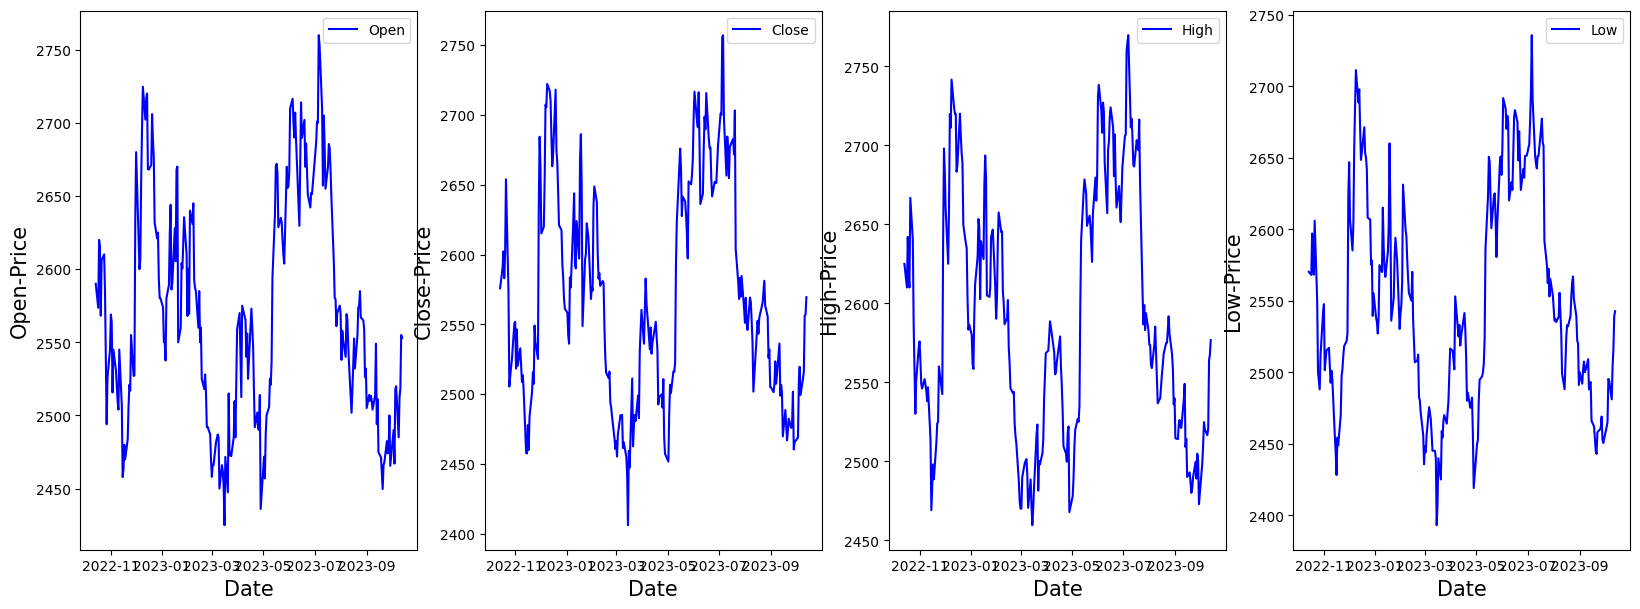

In [14]:
#plotting Open,Close,High,Low price on data index   "PLOTTING 4 GRAPHS IN SINGLE ROW"

fig,ax = plt.subplots(1,4,figsize=(20,7))

#1st sub plot => Open
ax[0].plot(data['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Open-Price',size=15)
ax[0].legend()

#2nd sub plot => Close
ax[1].plot(data['Close'],label='Close',color='blue')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Close-Price',size=15)
ax[1].legend()

#3rd sub plot => High
ax[2].plot(data['High'],label='High',color='blue')
ax[2].set_xlabel('Date',size=15)
ax[2].set_ylabel('High-Price',size=15)
ax[2].legend()

#4th sub plot => Low
ax[3].plot(data['Low'],label='Low',color='blue')
ax[3].set_xlabel('Date',size=15)
ax[3].set_ylabel('Low-Price',size=15)
ax[3].legend()

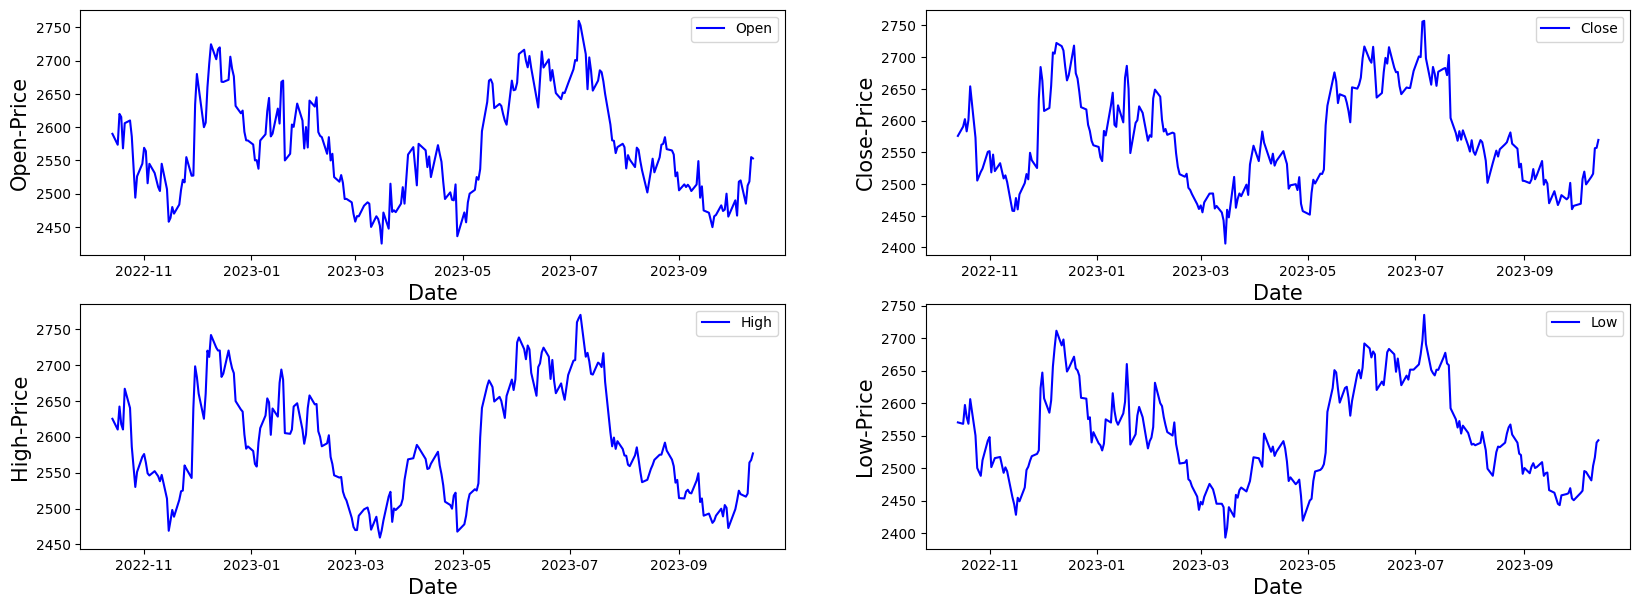

In [15]:
#plotting Open,Close,High,Low price on data index   "PLOTTING 4 GRAPHS IN TWO ROW"

fig,ax = plt.subplots(2,2,figsize=(20,7))

#1st sub plot => Open
ax[0, 0].plot(data['Open'],label='Open',color='blue')
ax[0, 0].set_xlabel('Date',size=15)
ax[0, 0].set_ylabel('Open-Price',size=15)
ax[0, 0].legend()

#2nd sub plot => Close
ax[0, 1].plot(data['Close'],label='Close',color='blue')
ax[0, 1].set_xlabel('Date',size=15)
ax[0, 1].set_ylabel('Close-Price',size=15)
ax[0, 1].legend()

#3rd sub plot => High
ax[1, 0].plot(data['High'],label='High',color='blue')
ax[1, 0].set_xlabel('Date',size=15)
ax[1, 0].set_ylabel('High-Price',size=15)
ax[1, 0].legend()

#4th sub plot => Low
ax[1, 1].plot(data['Low'],label='Low',color='blue')
ax[1, 1].set_xlabel('Date',size=15)
ax[1, 1].set_ylabel('Low-Price',size=15)
ax[1, 1].legend()

In [16]:
#In data preprocessing step i will normalize the data using MIN-MAX scaling method
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

#i have 2 types to define the columns i want to scale
#columns = ['Open', 'Close', 'High', 'Low']
#data[columns] = scale.fit_transform(data[columns_to_scale])
#or
data[data.columns] = scale.fit_transform(data)
data.head(20)

,Open,Close,High,Low
Date,,,,
2022-10-14,0.492760,0.483476,0.533290,0.517146
2022-10-17,0.443798,0.525498,0.485088,0.510725
2022-10-18,0.582326,0.558832,0.588425,0.595360
2022-10-19,0.568294,0.503988,0.509431,0.541077
2022-10-20,0.427526,0.554985,0.485249,0.511163
2022-10-21,0.540529,0.705982,0.668225,0.621626
2022-10-24,0.552770,0.475783,0.581977,0.458194
2022-10-25,0.480818,0.282905,0.407867,0.312272
2022-10-27,0.206150,0.321652,0.227309,0.277251


In [17]:
#i will split the data into training and testing data
#1] i will sort the date in ascending order
data = data.sort_values(by='Date')

#reset the index of sorted data frame
data = data.reset_index(drop=True)       #drop=true ensures that the old index is not retained as a separate column in the DataFrame

In [18]:
#2] i will allocate 75% to the training and remaining to the testing
train = 0.75

#calculating the splitting index
split_index = int(len(data) * train)

#then i will split the data training and testing sets

train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]
#integer based selection till the split index
train_data.shape, test_data.shape

((186, 4), (62, 4))

In [19]:
#i will create a sequence of data for training and testing
def create_sequence(dataset):
    sequences = []
    labels = []
    start_index = 0
    #i will select 50 rows at time
    for stop_index in range(50,len(dataset)):
        sequences.append(dataset.iloc[start_index:stop_index])
        labels.append(dataset.iloc[stop_index])
        start_index += 1
    return (np.array(sequences),np.array(labels))
        

In [20]:
train_sequence,train_label = create_sequence(train_data)
test_sequence,test_label = create_sequence(test_data)
train_sequence.shape,train_label.shape,test_sequence.shape,test_label.shape

((136, 50, 4), (136, 4), (12, 50, 4), (12, 4))

In [21]:
#i will import few libraries now:
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional


In [22]:
#model training
model = Sequential()   #imported from keras.models

model.add(LSTM(units=50, return_sequences=True, input_shape = (train_sequence.shape[1], train_sequence.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(4))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 4)                 204       
                                                                 
Total params: 31404 (122.67 KB)
Trainable params: 31404 (122.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_sequence, train_label, epochs=100, validation_data=(test_sequence, test_label), verbose=1)


Epoch 1/100
5/5 [==============================] - 9s 486ms/step - loss: 0.2373 - mean_absolute_error: 0.4149 - val_loss: 0.0295 - val_mean_absolute_error: 0.1424
Epoch 2/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0751 - mean_absolute_error: 0.2162 - val_loss: 0.0176 - val_mean_absolute_error: 0.1091
Epoch 3/100
5/5 [==============================] - 0s 78ms/step - loss: 0.0453 - mean_absolute_error: 0.1777 - val_loss: 0.0135 - val_mean_absolute_error: 0.0975
Epoch 4/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0312 - mean_absolute_error: 0.1450 - val_loss: 0.0110 - val_mean_absolute_error: 0.0886
Epoch 5/100
5/5 [==============================] - 0s 54ms/step - loss: 0.0349 - mean_absolute_error: 0.1517 - val_loss: 0.0090 - val_mean_absolute_error: 0.0812
Epoch 6/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0266 - mean_absolute_error: 0.1330 - val_loss: 0.0092 - val_mean_absolute_error: 0.0812
Epoch 7/100
5/5 [==========

In [24]:
#making the predictions of LSTM model

predictions = model.predict(test_sequence)
predictions[:5]

1/1 [==============================] - 1s 1s/step


array([[0.16219786, 0.2100654 , 0.12355525, 0.19425325],
       [0.18754101, 0.23514725, 0.15013474, 0.21500023],
       [0.19433019, 0.24083932, 0.15867558, 0.22334503],
       [0.1826801 , 0.22935733, 0.14882594, 0.21648504],
       [0.17962377, 0.22627406, 0.14669275, 0.21437763]], dtype=float32)

In [25]:
# Inversing normalization/scaling on predicted data 
predictions = scale.inverse_transform(predictions)
predictions[:5]#displays 1st 5 predictions after applying inverse transformation

array([[2479.278 , 2479.833 , 2497.8208, 2459.561 ],
       [2487.7668, 2488.6367, 2506.0642, 2466.6697],
       [2490.0408, 2490.6348, 2508.7131, 2469.529 ],
       [2486.1387, 2486.6045, 2505.6582, 2467.1785],
       [2485.115 , 2485.5222, 2504.9966, 2466.4563]], dtype=float32)

In [26]:
data.shape

(248, 4)

In [27]:
predictions.shape

(12, 4)

In [28]:
# Ensure that both data_actual and data_predicted have the same number of rows (12 in this case)
data = data.iloc[-12:].copy()
data_predicted = pd.DataFrame(predictions,columns=['open_predicted','close_predicted','high_predicted','low_predicted'], index=data.index)

# Concatenate the data frames without specifying column names
data_merge = pd.concat([data, data_predicted], axis=1)


In [29]:
#again inversing/scaling
data_merge[['Open','Close','High','Low']] = scale.inverse_transform(data_merge[['Open','Close','High','Low']])
data_merge.head()

,Open,Close,High,Low,open_predicted,close_predicted,high_predicted,low_predicted
236,2476.000000,2501.750000,2504.800049,2469.000000,2479.278076,2479.833008,2497.820801,2459.561035
237,2500.000000,2460.350098,2501.000000,2453.199951,2487.766846,2488.636719,2506.064209,2466.669678
238,2465.550049,2465.600098,2472.800049,2450.500000,2490.040771,2490.634766,2508.713135,2469.529053
239,2490.000000,2468.899902,2499.000000,2461.800049,2486.138672,2486.604492,2505.658203,2467.178467
240,2467.050049,2507.850098,2511.050049,2465.149902,2485.114990,2485.522217,2504.996582,2466.456299


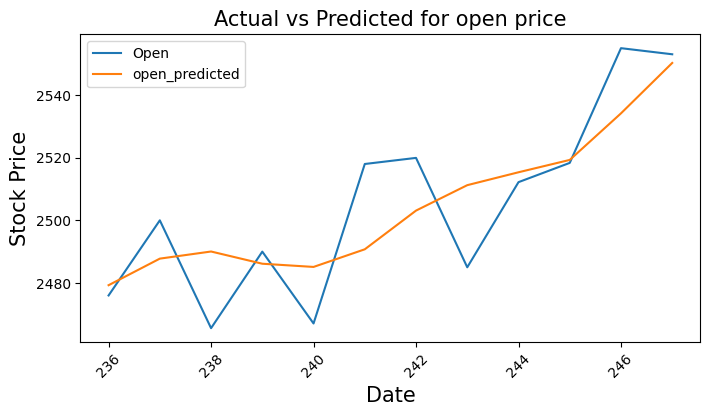

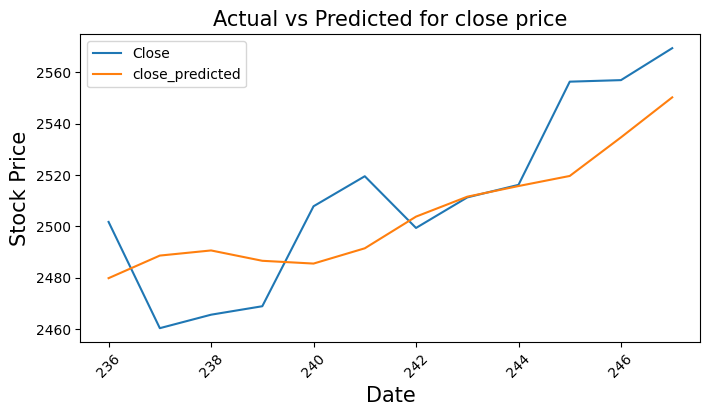

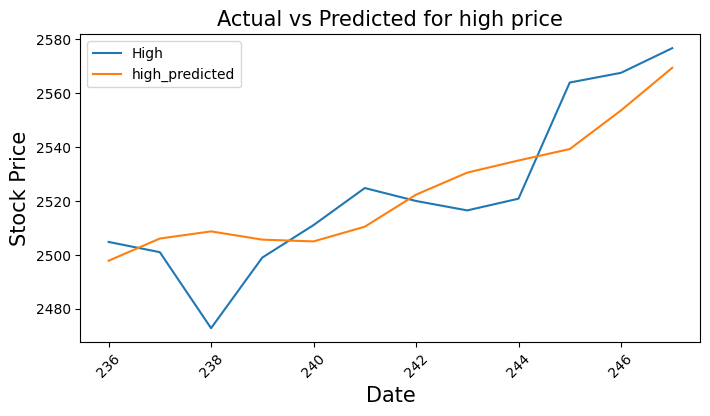

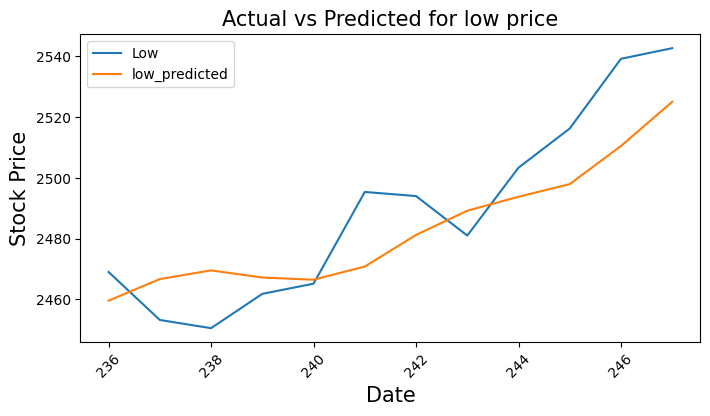

In [30]:
#now i will plot the actual and predicted prices on date index= open
data_merge[['Open','open_predicted']].plot(figsize=(8,4))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()



#now i will plot the actual and predicted prices on date index= close
data_merge[['Close','close_predicted']].plot(figsize=(8,4))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()


#now i will plot the actual and predicted prices on date index=high
data_merge[['High','high_predicted']].plot(figsize=(8,4))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for high price',size=15)
plt.show()


#now i will plot the actual and predicted prices on date index= low
data_merge[['Low','low_predicted']].plot(figsize=(8,4))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for low price',size=15)
plt.show()




In [68]:
# # Define the number of features
# n_features = 4  # Number of features in your input data

# # Define the number of days ahead to predict
# n_days_ahead = 30  # You can adjust this value as needed

# # Get the last 'n_steps' days from the training data to start predictions
# n_steps = 50  # Adjust this based on your available data points

# # Create an empty list to store the predicted prices
# predicted_prices = []

# # Make predictions for the next 'n_days_ahead' days
# for _ in range(n_days_ahead):
#     # Check if there are enough data points for prediction
#     if len(last_data) < n_steps:
#         break

#     # Convert the DataFrame to a NumPy array and reshape the data for prediction
#     input_data = last_data[-n_steps:].to_numpy().reshape(1, n_steps, n_features)

#     # Use the model to predict the next day's prices
#     prediction = model.predict(input_data)

#     # Inverse scaling to get the original values
#     prediction = scale.inverse_transform(prediction)

#     # Append the prediction to the list
#     predicted_prices.append(prediction[0])

#     # Update 'last_data' for the next iteration
#     last_data = np.append(last_data, prediction, axis=0)

# # Create a date range for the next 'n_days_ahead' days
# dates = pd.date_range(start=data.index[-1], periods=len(predicted_prices), closed='right')

# # Create a DataFrame for predicted prices
# predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'Close', 'High', 'Low'], index=dates)


In [38]:
# # Define the number of features
# n_features = 4  # Number of features in my input data

# # Define the number of days ahead to predict

# n_days_ahead = 30  
# # Get the last 'n_steps' days from the training data to start predictions
# n_steps = 50  

# # Create an empty list to store the predicted prices
# predicted_prices = []

# # Make predictions for the next 'n_days_ahead' days
# for _ in range(n_days_ahead):
#     # Check if there are enough data points for prediction
#     if len(last_data) < n_steps:
#         break

#     # Reshape the data for prediction
#     input_data = last_data[-n_steps:].reshape(1, n_steps, n_features)

#     # Use the model to predict the next day's prices
#     prediction = model.predict(input_data)

#     # Inverse scaling to get the original values
#     prediction = scale.inverse_transform(prediction)

#     # Append the prediction to the list
#     predicted_prices.append(prediction[0])

#     # Update 'last_data' for the next iteration
#     last_data = np.append(last_data, prediction, axis=0)

# # Create a date range for the next 'n_days_ahead' days
# # dates = pd.date_range(start=data.index[-1], periods=len(predicted_prices), closed='right')
# dates = pd.date_range(start=data.index[-1], periods=len(predicted_prices))


# # Create a DataFrame for predicted prices
# predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'Close', 'High', 'Low'], index=dates)


In [41]:
# Define the number of features
n_features = 4  # Number of features my your input data

# Define the number of days ahead to predict
n_days_ahead = 30  

# Get the last 'n_steps' days from the training data to start predictions
n_steps = 50  

# Create an empty list to store the predicted prices
predicted_prices = []

# Make predictions for the next 'n_days_ahead' days
for _ in range(n_days_ahead):
    # Check if there are enough data points for prediction
    if len(last_data) < n_steps:
        break

    # Reshape the data for prediction
    input_data = last_data[-n_steps:].reshape(1, n_steps, n_features)

    # Use the model to predict the next day's prices
    prediction = model.predict(input_data)

    # Inverse scaling to get the original values
    prediction = scale.inverse_transform(prediction)

    # Append the prediction to the list
    predicted_prices.append(prediction[0])

    # Update 'last_data' for the next iteration
    last_data = np.append(last_data, prediction, axis=0)

# Create a date range for the next 'n_days_ahead' days
dates = pd.date_range(start=data.index[-1], periods=n_days_ahead)

# Create a DataFrame for predicted prices
predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'Close', 'High', 'Low'], index=dates)


1/1 [==============================] - 0s 33ms/step


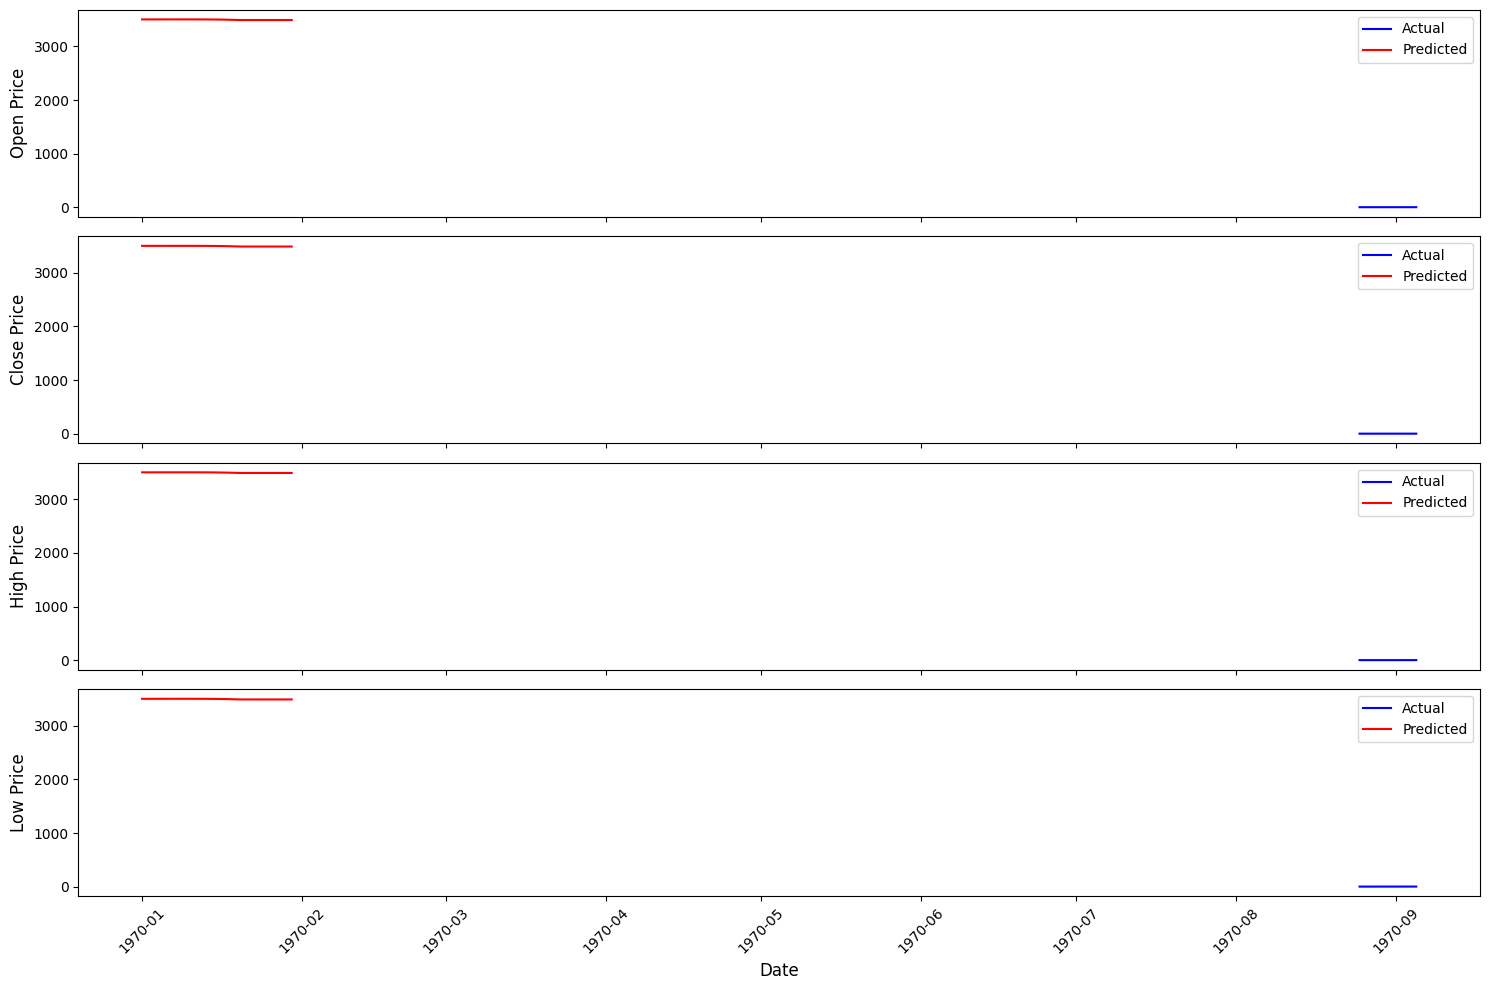

In [42]:
# Plot the predicted prices
fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

for i in range(4):
    ax[i].plot(data['Close'], label='Actual', color='blue')
    ax[i].plot(predicted_df['Close'], label='Predicted', color='red')
    ax[i].set_ylabel(['Open', 'Close', 'High', 'Low'][i] + ' Price', size=12)
    ax[i].legend()

plt.xlabel('Date', size=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#step1
actual_prices = [120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0]
# i will Visualize the actual vs. predicted data for the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(actual_prices[-20:], label='Actual Prices', color='blue', marker='o')
plt.plot(predicted_df['Close'], label='Predicted Prices', color='red', marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for the Next 30 Days')
plt.legend()
plt.show()

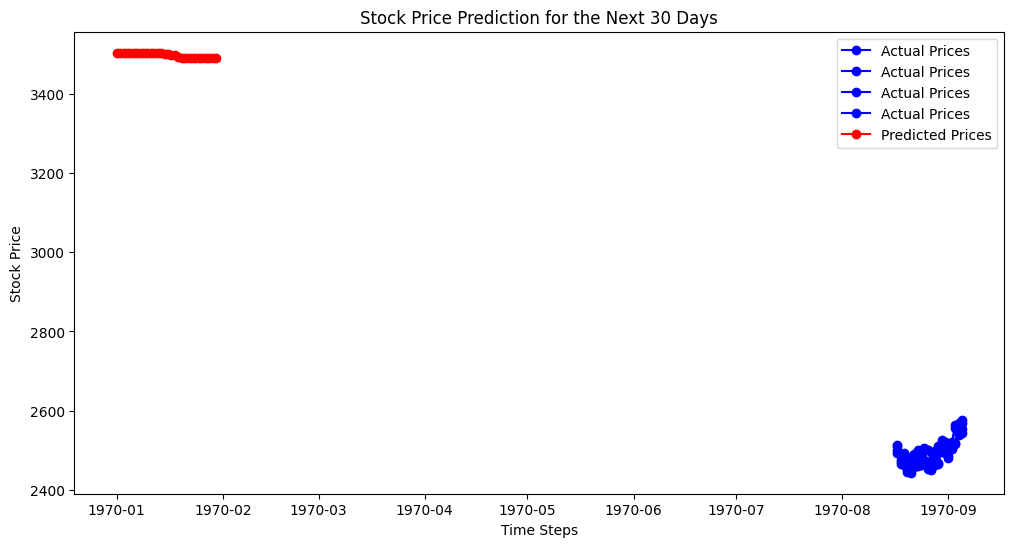

In [51]:
#step2
# actual_prices = actual_prices['Open','Close','High','Low'].read_csv('C:/Users/pc/Desktop/HUstock.csv')
# # Read the CSV file and select the columns 'Open', 'Close', 'High', 'Low'
actual_prices = pd.read_csv('C:/Users/pc/Desktop/HUstock.csv', usecols=['Open', 'Close', 'High', 'Low'])


# i will Visualize the actual vs. predicted data for the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(actual_prices[-20:], label='Actual Prices', color='blue', marker='o')
plt.plot(predicted_df['Close'], label='Predicted Prices', color='red', marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for the Next 30 Days')
plt.legend()
plt.show()

1/1 [==============================] - 0s 63ms/step


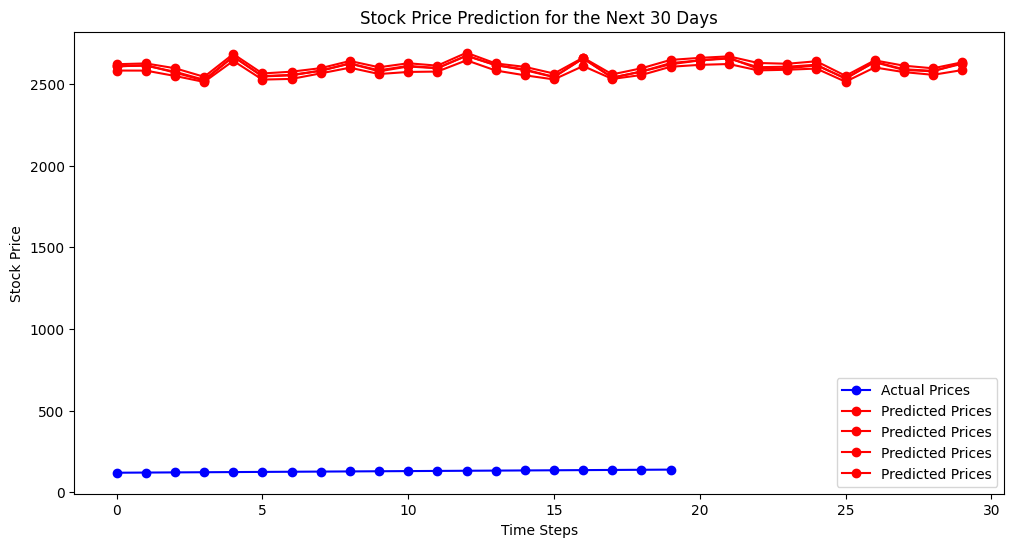

In [44]:
# # Visualizing Actual vs Predicted Data
# plt.figure(figsize=(12, 6))
# plt.plot(actual_prices[-20:], label='Actual Prices', color='blue', marker='o')
# predicted_future_prices = model.predict(X[-20:])
# predicted_future_prices = scale.inverse_transform(predicted_future_prices)
# plt.plot(predicted_future_prices, label='Predicted Prices', color='red', marker='o')
# plt.xlabel('Time Steps')
# plt.ylabel('Stock Price')
# plt.title('Google Stock Price Prediction for Next 20 Days')
# plt.legend()
# plt.show()


# Visualizing Actual vs Predicted Data for the Next 20 Days


# Create a placeholder for future input data (replace with your actual data)
# This is a random example; you should use your own input data
future_input_data = np.random.rand(30, n_steps, n_features)

# Visualizing Actual vs Predicted Data for the Next 30 Days
plt.figure(figsize=(12, 6))
plt.plot(actual_prices[-30:], label='Actual Prices', color='blue', marker='o')

# Make predictions for the next 20 days
predicted_future_prices = model.predict(future_input_data)
predicted_future_prices = scale.inverse_transform(predicted_future_prices)

plt.plot(predicted_future_prices, label='Predicted Prices', color='red', marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for the Next 30 Days')
plt.legend()
plt.show()


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define the number of epochs and batch size
epochs = 50  # You can adjust this based on your preference
batch_size = 32  # You can adjust this based on your preference

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_sequence, train_label, test_size=0.2, random_state=42)

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))



Epoch 1/50
4/4 [==============================] - 8s 551ms/step - loss: 0.0082 - mean_absolute_error: 0.0714 - val_loss: 0.0144 - val_mean_absolute_error: 0.0986
Epoch 2/50
4/4 [==============================] - 0s 67ms/step - loss: 0.0078 - mean_absolute_error: 0.0707 - val_loss: 0.0106 - val_mean_absolute_error: 0.0771
Epoch 3/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0070 - mean_absolute_error: 0.0660 - val_loss: 0.0106 - val_mean_absolute_error: 0.0791
Epoch 4/50
4/4 [==============================] - 0s 89ms/step - loss: 0.0056 - mean_absolute_error: 0.0601 - val_loss: 0.0109 - val_mean_absolute_error: 0.0842
Epoch 5/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0061 - mean_absolute_error: 0.0616 - val_loss: 0.0099 - val_mean_absolute_error: 0.0776
Epoch 6/50
4/4 [==============================] - 0s 66ms/step - loss: 0.0056 - mean_absolute_error: 0.0609 - val_loss: 0.0099 - val_mean_absolute_error: 0.0770
Epoch 7/50
4/4 [=================

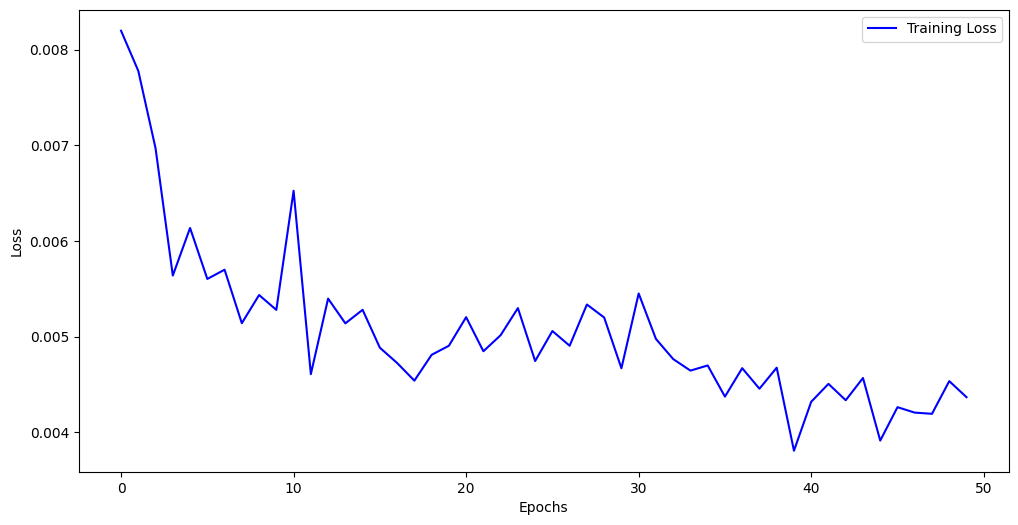

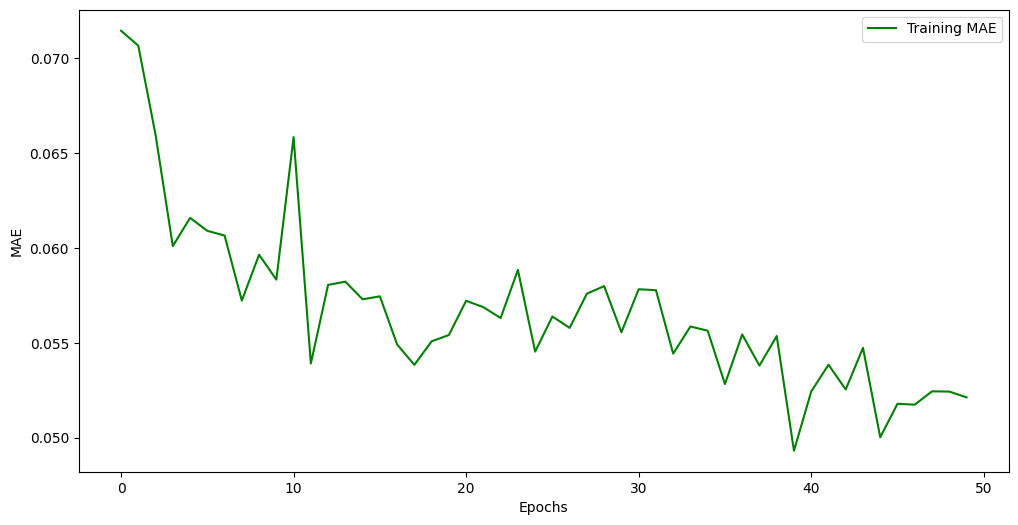

In [46]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training mean absolute error (MAE)
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions on the test data
test_predictions = model.predict(test_sequence)

# Inverse scaling to get the original values
test_predictions = scale.inverse_transform(test_predictions)
test_label = scale.inverse_transform(test_label)

# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_label, test_predictions)
rmse = np.sqrt(mean_squared_error(test_label, test_predictions))

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')



1/1 [==============================] - 2s 2s/step
Mean Absolute Error (MAE): 14.62
Root Mean Squared Error (RMSE): 17.48


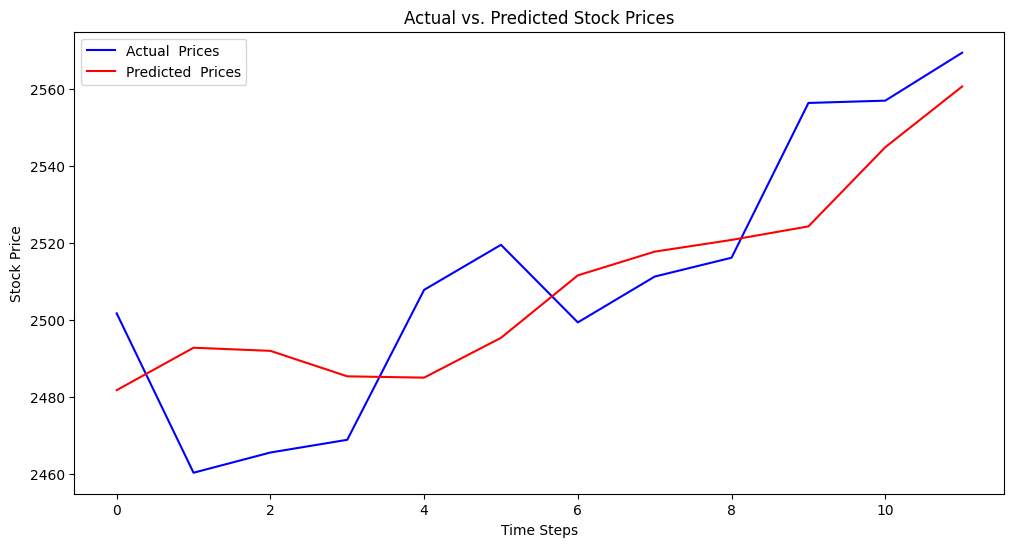

In [48]:
# Plot actual vs. predicted prices for 'Close'
plt.figure(figsize=(12, 6))
plt.plot(test_label[:, 1], label='Actual  Prices', color='blue')
plt.plot(test_predictions[:, 1], label='Predicted  Prices', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()